# VRPLIB

---

## *This is an exemple of how to import instances with VRPLIB*

### 1/ Import VRPLIB

In [2]:
import vrplib
import os
import matplotlib.pyplot as plt

### 2/ Import an instance 

In [3]:
instance_name = "C101.txt"
instance_path = os.path.join("..", "instances", instance_name)

data = vrplib.read_instance(instance_path, instance_format="solomon")

#### Main informations

In [4]:
print("Available keys in this instance :")
print(list(data.keys()))

print(f"\nVehicules capacity : {data.get('capacity')}")
print(f"Depot indice : {data.get('depot', 0)}")

print("\nPremiers clients :")
for i in range(0, 6):
    print(f"Client {i} -> "
          f"Coord: {data['node_coord'][i]}, "
          f"Demand: {data['demand'][i]}, "
          f"Time window: {data['time_window'][i]}, "
          f"Service time: {data['service_time'][i]}")

Available keys in this instance :
['name', 'vehicles', 'capacity', 'node_coord', 'demand', 'time_window', 'service_time', 'edge_weight']

Vehicules capacity : 200
Depot indice : 0

Premiers clients :
Client 0 -> Coord: [40 50], Demand: 0, Time window: [   0 1236], Service time: 0
Client 1 -> Coord: [45 68], Demand: 10, Time window: [912 967], Service time: 90
Client 2 -> Coord: [45 70], Demand: 30, Time window: [825 870], Service time: 90
Client 3 -> Coord: [42 66], Demand: 10, Time window: [ 65 146], Service time: 90
Client 4 -> Coord: [42 68], Demand: 10, Time window: [727 782], Service time: 90
Client 5 -> Coord: [42 65], Demand: 10, Time window: [15 67], Service time: 90


### 4/ Draw the nodes and the depot

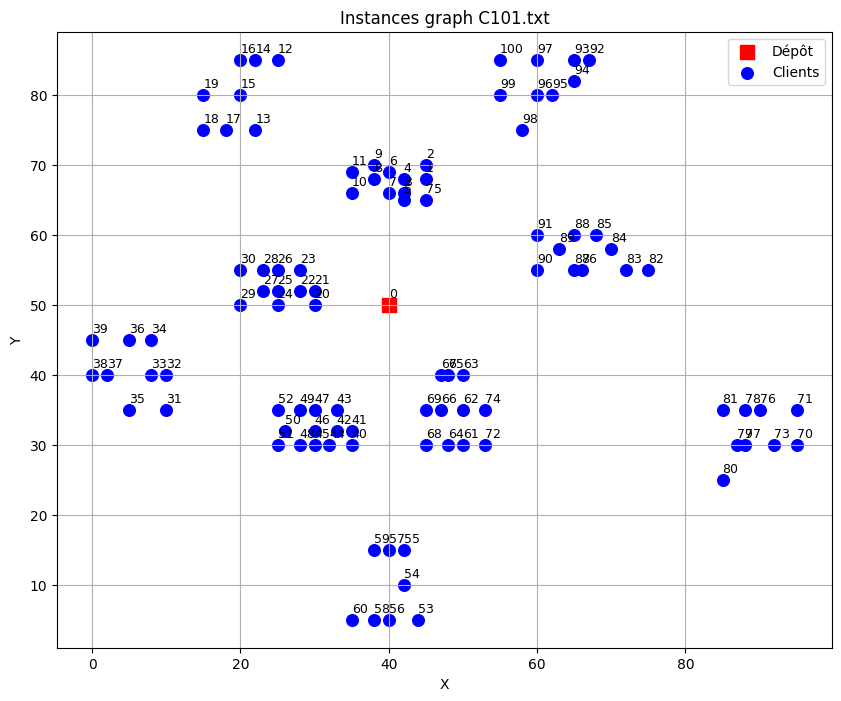

In [5]:
coords = data['node_coord']
x = [c[0] for c in coords]
y = [c[1] for c in coords]

plt.figure(figsize=(10, 8))

plt.scatter(x[0], y[0], c='red', s=100, label='Dépôt', marker='s')
plt.scatter(x[1:], y[1:], c='blue', s=70, label='Clients')

for i, (xi, yi) in enumerate(coords):
    plt.text(xi, yi+1, str(i), fontsize=9)

plt.xlabel('X')
plt.ylabel('Y')
plt.title(f"Instances graph {instance_name}")
plt.legend()
plt.grid(True)
plt.show()


### 5/ The .sol solution

{'routes': [[5, 3, 7, 8, 10, 11, 9, 6, 4, 2, 1, 75], [13, 17, 18, 19, 15, 16, 14, 12], [20, 24, 25, 27, 29, 30, 28, 26, 23, 22, 21], [32, 33, 31, 35, 37, 38, 39, 36, 34], [43, 42, 41, 40, 44, 46, 45, 48, 51, 50, 52, 49, 47], [57, 55, 54, 53, 56, 58, 60, 59], [67, 65, 63, 62, 74, 72, 61, 64, 68, 66, 69], [81, 78, 76, 71, 70, 73, 77, 79, 80], [90, 87, 86, 83, 82, 84, 85, 88, 89, 91], [98, 96, 95, 94, 92, 93, 97, 100, 99]], 'cost': 827.3}


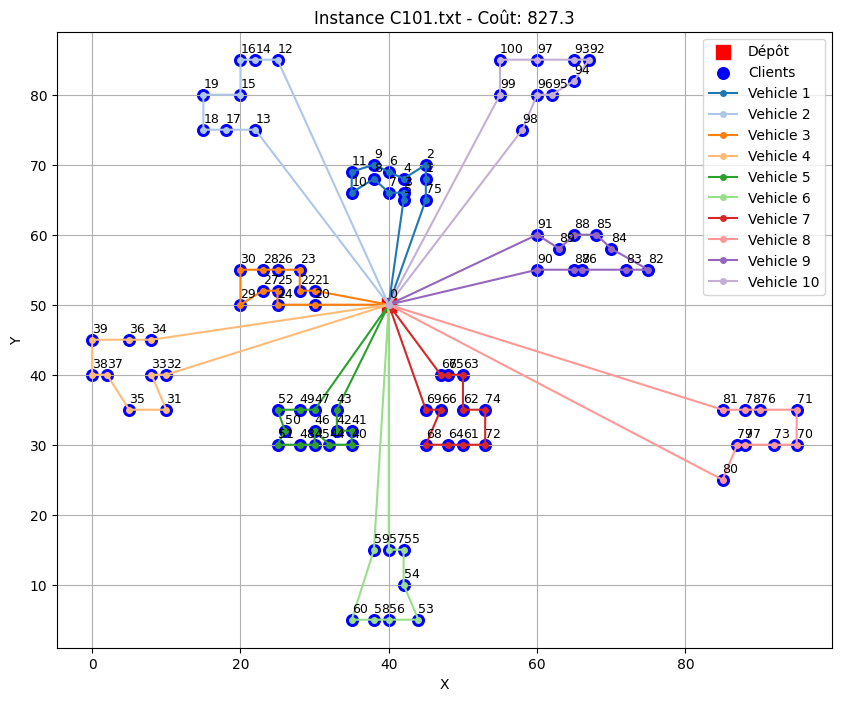

In [6]:
solution_path = os.path.join("..", "instances", instance_name.replace(".txt", ".sol"))
solution = vrplib.read_solution(solution_path)

print(solution)


# Like before
coords = data['node_coord']
x = [c[0] for c in coords]
y = [c[1] for c in coords]

plt.figure(figsize=(10, 8))

plt.scatter(x[0], y[0], c='red', s=100, label='Dépôt', marker='s')
plt.scatter(x[1:], y[1:], c='blue', s=70, label='Clients')

for i, (xi, yi) in enumerate(coords):
    plt.text(xi, yi+1, str(i), fontsize=9)


# Drawing the trucks solutions
colors = plt.cm.tab20.colors

for i, route in enumerate(solution['routes']):
    full_route = [0] + route + [0]
    
    route_coords = [coords[node] for node in full_route]
    rx = [c[0] for c in route_coords]
    ry = [c[1] for c in route_coords]
    
    color = colors[i % len(colors)]
    plt.plot(rx, ry, '-o', color=color, label=f'Vehicle {i+1}', markersize=4, linewidth=1.5)

plt.xlabel('X')
plt.ylabel('Y')
plt.title(f"Instance {instance_name} - Coût: {solution['cost']}")
plt.legend()
plt.grid(True)
plt.show()